In [ ]:
!pip install pylibjpeg pylibjpeg-libjpeg pydicom

In [ ]:
!pip install scipy==1.1.0
!pip install git+https://github.com/vatsalsaglani/xrayimage_extractfeatures.git

  Cloning https://github.com/vatsalsaglani/xrayimage_extractfeatures.git to /tmp/pip-req-build-ge6zreql
  Running command git clone -q https://github.com/vatsalsaglani/xrayimage_extractfeatures.git /tmp/pip-req-build-ge6zreql


In [ ]:
import pydicom
from pydicom import dcmread
from pydicom.data import get_testdata_files
from xtract_features.glcms import *
import matplotlib.pyplot as plt

ds = dcmread("/content/IM0001.dcm")
img = ds.pixel_array
feats = glcm(img)
# energy
energy = feats.energy()
print(energy,"energy")
# correlation
corr = feats.correlation()
print(corr, "corr")
# contrast
cont = feats.contrast()
print(cont,"cont")
# homogeneity
homogeneity = feats.homogeneity()
print(homogeneity, "homogeneity")
# all the features at once
_all = feats.glcm_all()
print(_all)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] energy
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] corr
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] cont
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] homogeneity
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
from xtract_features.moments import *
s = moments(img)
_moments = s.get_moments()
_hu_moments = s.get_HuMoments()
print(s.get_moments())
print(s.get_HuMoments())

[121021334.0, 30236900823.0, 34864936271.0, 9927555651899.0, 8652730495342.0, 10720827457861.0, 3673416322983543.0, 2842084388790140.0, 2640907643422144.0, 3477384337438463.0, 2372935807930.5137, -58193317697.793945, 676616730677.2168, 7294405762205.5, 11142003221282.875, -4136609337249.2188, -1021911831750.5, 0.00016201757156853505, -3.973280686060984e-06, 4.619754113052445e-05, 4.527256265694647e-08, 6.915258835380612e-08, -2.567377131366237e-08, -6.342472429009916e-09]
[0.0002082151126990595, 1.3477427288302603e-08, 6.066633380431415e-14, 4.3292232846039255e-15, -6.495005869728826e-29, -4.3199937297165975e-19, -2.6531094989749683e-29]


In [ ]:
from xtract_features.region_props import *
_rp = region_props(img)
# maximum area region
max_area = _rp.max_area()
print(max_area, "max_area")

# mean of areas of all the regions
print(_rp.mean_area(), "mean_area")
# eccentricity of the highest area region
print(_rp.eccentricity(), "eccentricity")

print(_rp.euler_number(), "euler_number")
print(_rp.solidity(), "solidity")
print(_rp.perimeter(), "perimeter")
# standard deviation of all the areas of the regions of the given image
print(_rp.std_area(), "std_area")
# otsu’s Threshold
print(_rp.thresh_img(), "thresh_img")
print(_rp.bb(), "bb")
print(_rp.bb_area(), "bb_area")
print(_rp.centroid_r(), "centroid_r")
print(_rp.convex_area_r(), "convex_area_r")
print(_rp.coordinates_r(), "coordinates_r")
print(_rp.eq_diameter(), "eq_diameter")
print(_rp.extent_r(), "extent_r")
print(_rp.filled_area_r(), "filled_area_r")
print(_rp.inertia_tensor_r(), "inertia_tensor_r")
print(_rp.label_r(), "label_r")
print(_rp.inertia_tensor_eigvals_r(), "inertia_tensor_eigvals_r")
print(_rp.local_centroid_r(), "local_centroid_r")
print(_rp.maj_ax_len(), "maj_ax_len")
print(_rp.min_ax_len(), "min_ax_len")
print(_rp.orient(), "orient")

7 max_area
2 mean_area
0.9939810217011976 eccentricity
-1 euler_number
-1 solidity
-1 perimeter
1.4142135623730951 std_area
561 thresh_img
(385, 396, 388, 403) bb
21 bb_area
(386.0, 399.0) centroid_r
11 convex_area_r
[[385 401]
 [385 402]
 [386 398]
 [386 399]
 [386 400]
 [387 396]
 [387 397]] coordinates_r
2.985410660720923 eq_diameter
0.3333333333333333 extent_r
7 filled_area_r
[[4.         1.42857143]
 [1.42857143 0.57142857]] inertia_tensor_r
2 label_r
[4.517214193116187, 0.05421437831238435] inertia_tensor_eigvals_r
(1.0, 3.0) local_centroid_r
8.501495579594158 maj_ax_len
0.9313592502349185 min_ax_len
-1.223427188696545 orient


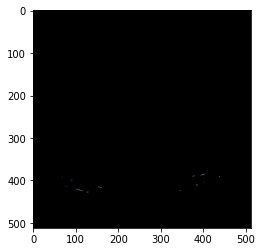

In [ ]:
# plot regions
_rp.plot_image()

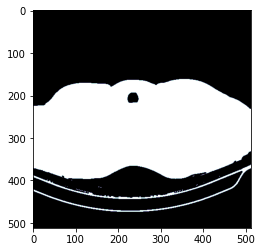

In [ ]:
# plot black and white
_rp.plot_show_bw()


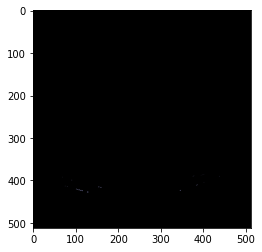

In [ ]:
# plot with lables
_rp.plot_image_with_label()

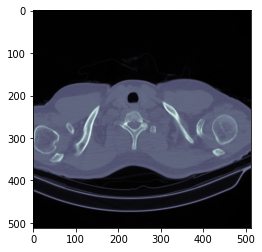

In [ ]:
from xtract_features.helpers import show
# show with title
show(img, title = "ct")

In [ ]:
#1 entropy

from xtract_features.extract import s_entropy, entropy_simple
# shannon's entropy
s_entr = s_entropy(img)
print(s_entr, "shannon entropy")

# simple entropy
entr_simp = entropy_simple(img)
print(entr_simp, "simple entropy")

8.654776332077951 shannon entropy
5.999033812956776 simple entropy


title =  identity


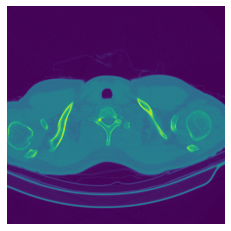

title =  edge-all


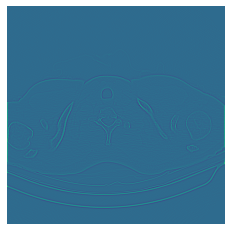

title =  edge-H


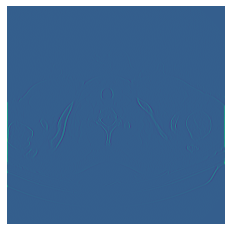

title =  edge-V


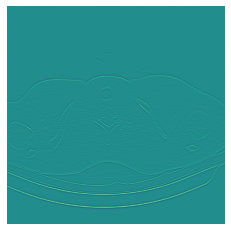

title =  sharp


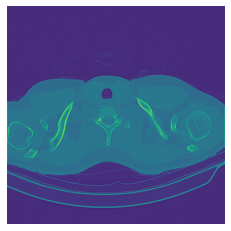

title =  gauss-3


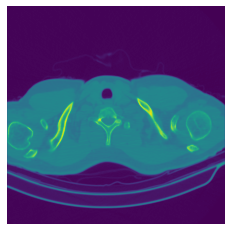

title =  gauss-5


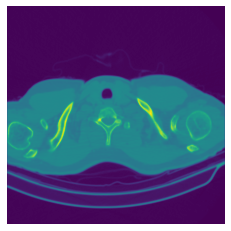

title =  boxblur


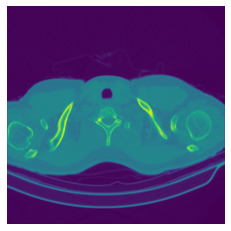

title =  unsharp


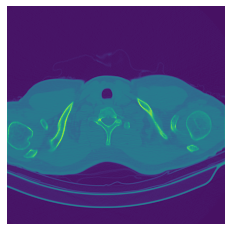

title =  gradient-H


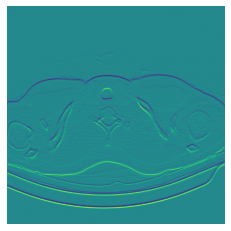

title =  gradient-V


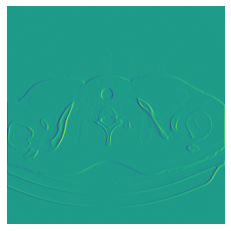

title =  sobel-H


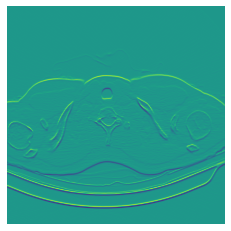

title =  sobel-V


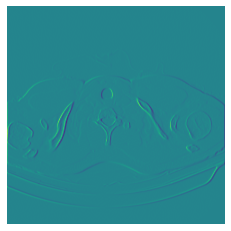

title =  emboss


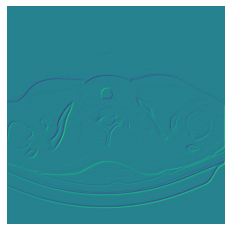

In [ ]:
from xtract_features.twodconv import conv2d
kernels = ['identity', 'edge-all', 'edge-H', 'edge-V', 'sharp', 'gauss-3','gauss-5', 'boxblur', 'unsharp', 'gradient-H', 'gradient-V', 'sobel-H', 'sobel-V', 'emboss']
for kernel in kernels:
  pic = conv2d(img, kernel)
  print("title = ", kernel)
  plt.imshow(pic)
  plt.show()

/usr/local/lib/python3.7/dist-packages/xtract_features/segmentations.py:6: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_maxi = peak_local_max(distance, indices=False, footprint=footprint, labels=image)
/usr/local/lib/python3.7/dist-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


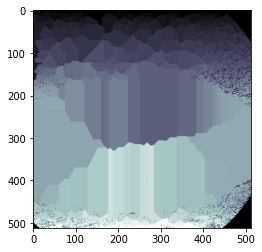

In [ ]:
from xtract_features.segmentations import water_seg
water_seg(img)